In [1]:
import librosa
import librosa.display
import IPython.display as ipd

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import os

import torch
import torchaudio
from torchaudio import transforms
import torchvision
from PIL import Image


In [2]:
!ls


__notebook__.ipynb


In [3]:
!mkdir cv-valid-train-2

In [4]:
!ls

__notebook__.ipynb  cv-valid-train-2


In [5]:
import torch
import torch.nn as nn
import torchvision.models as models



# Preprocessing data

In [6]:
dir_path = "../input/common-voice"

valid_train_df = pd.read_csv("../input/common-voice/cv-valid-train.csv")
valid_train_df.head()
valid_train_df.count()

filename      195776
text          195776
up_votes      195776
down_votes    195776
age            73768
gender         74059
accent         64711
duration           0
dtype: int64

In [7]:
valid_train_filter_df = valid_train_df[valid_train_df["gender"].notnull()]

In [8]:
valid_train_filter_df.head(20)

,filename,text,up_votes,down_votes,age,gender,accent,duration
5,cv-valid-train/sample-000005.mp3,a shepherd may like to travel but he should ne...,1,0,twenties,female,us,NaN
8,cv-valid-train/sample-000008.mp3,put jackie right on the staff,3,0,seventies,male,us,NaN
13,cv-valid-train/sample-000013.mp3,but he had found a guide and didn't want to mi...,1,0,thirties,female,us,NaN
14,cv-valid-train/sample-000014.mp3,as they began to decorate the hallway a silhou...,1,0,sixties,male,england,NaN
19,cv-valid-train/sample-000019.mp3,then they got ahold of some dough and went goofy,1,0,fifties,male,australia,NaN
20,cv-valid-train/sample-000020.mp3,it was faintly marked with transverse stripes ...,5,1,thirties,male,england,NaN
23,cv-valid-train/sample-000023.mp3,i had seen all that it would presently bring me,5,0,thirties,male,us,NaN
26,cv-valid-train/sample-000026.mp3,two years ago right here on this spot i had a ...,4,0,twenties,female,australia,NaN
27,cv-valid-train/sample-000027.mp3,don't let them see that you're afraid the alch...,3,0,twenties,male,australia,NaN
29,cv-valid-train/sample-000029.mp3,the fire alarm went off again but when i looke...,1,0,thirties,male,indian,NaN


In [9]:
valid_train_filter_df.count()

filename      74059
text          74059
up_votes      74059
down_votes    74059
age           73466
gender        74059
accent        63756
duration          0
dtype: int64

In [10]:
def convert_gender_to_labels(gender):
    return 0 if gender == "female" else 1


valid_train_filter_df["target_gender"] = valid_train_filter_df['gender'].apply(lambda gender: 0 if str(gender) == "female" else 1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [11]:
valid_train_filter_df.head(20)

,filename,text,up_votes,down_votes,age,gender,accent,duration,target_gender
5,cv-valid-train/sample-000005.mp3,a shepherd may like to travel but he should ne...,1,0,twenties,female,us,NaN,0
8,cv-valid-train/sample-000008.mp3,put jackie right on the staff,3,0,seventies,male,us,NaN,1
13,cv-valid-train/sample-000013.mp3,but he had found a guide and didn't want to mi...,1,0,thirties,female,us,NaN,0
14,cv-valid-train/sample-000014.mp3,as they began to decorate the hallway a silhou...,1,0,sixties,male,england,NaN,1
19,cv-valid-train/sample-000019.mp3,then they got ahold of some dough and went goofy,1,0,fifties,male,australia,NaN,1
20,cv-valid-train/sample-000020.mp3,it was faintly marked with transverse stripes ...,5,1,thirties,male,england,NaN,1
23,cv-valid-train/sample-000023.mp3,i had seen all that it would presently bring me,5,0,thirties,male,us,NaN,1
26,cv-valid-train/sample-000026.mp3,two years ago right here on this spot i had a ...,4,0,twenties,female,australia,NaN,0
27,cv-valid-train/sample-000027.mp3,don't let them see that you're afraid the alch...,3,0,twenties,male,australia,NaN,1
29,cv-valid-train/sample-000029.mp3,the fire alarm went off again but when i looke...,1,0,thirties,male,indian,NaN,1


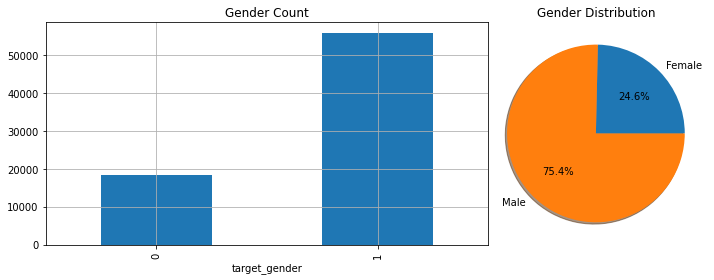

In [12]:
plt.subplot(1, 2, 1)
valid_train_filter_df.groupby('target_gender')['filename'].count().plot.bar()
plt.grid(True)
plt.title('Gender Count')
plt.subplots_adjust(right=1.9)

# Biểu đồ phân phối các câu hỏi 
plt.subplot(1, 2, 2)
values = [valid_train_filter_df[valid_train_filter_df['target_gender']==0].shape[0], valid_train_filter_df[valid_train_filter_df['target_gender']==1].shape[0]]
labels = ['Female', 'Male']

plt.pie(values, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title('Gender Distribution')
plt.tight_layout()
plt.subplots_adjust(right=1.9)

plt.show()


In [13]:
female_df = valid_train_filter_df[valid_train_filter_df["gender"] == "female"]


In [14]:
female_df = female_df.head(5000)

In [15]:
female_df.count()

filename         5000
text             5000
up_votes         5000
down_votes       5000
age              4963
gender           5000
accent           4515
duration            0
target_gender    5000
dtype: int64

In [16]:
male_df = valid_train_filter_df[valid_train_filter_df["gender"] == "male"]
male_df = male_df.head(5000)

In [17]:
male_df.count()

filename         5000
text             5000
up_votes         5000
down_votes       5000
age              4971
gender           5000
accent           4249
duration            0
target_gender    5000
dtype: int64

In [18]:
pd_total = [male_df, female_df]
pd_result = pd.concat(pd_total)

In [19]:
pd_result.count()

filename         10000
text             10000
up_votes         10000
down_votes       10000
age               9934
gender           10000
accent            8764
duration             0
target_gender    10000
dtype: int64

In [20]:
pd_result.head()

,filename,text,up_votes,down_votes,age,gender,accent,duration,target_gender
8,cv-valid-train/sample-000008.mp3,put jackie right on the staff,3,0,seventies,male,us,NaN,1
14,cv-valid-train/sample-000014.mp3,as they began to decorate the hallway a silhou...,1,0,sixties,male,england,NaN,1
19,cv-valid-train/sample-000019.mp3,then they got ahold of some dough and went goofy,1,0,fifties,male,australia,NaN,1
20,cv-valid-train/sample-000020.mp3,it was faintly marked with transverse stripes ...,5,1,thirties,male,england,NaN,1
23,cv-valid-train/sample-000023.mp3,i had seen all that it would presently bring me,5,0,thirties,male,us,NaN,1


In [21]:
pd_result = pd_result.sort_values(by = 'filename')

In [22]:
pd_result.head(50)

,filename,text,up_votes,down_votes,age,gender,accent,duration,target_gender
5,cv-valid-train/sample-000005.mp3,a shepherd may like to travel but he should ne...,1,0,twenties,female,us,NaN,0
8,cv-valid-train/sample-000008.mp3,put jackie right on the staff,3,0,seventies,male,us,NaN,1
13,cv-valid-train/sample-000013.mp3,but he had found a guide and didn't want to mi...,1,0,thirties,female,us,NaN,0
14,cv-valid-train/sample-000014.mp3,as they began to decorate the hallway a silhou...,1,0,sixties,male,england,NaN,1
19,cv-valid-train/sample-000019.mp3,then they got ahold of some dough and went goofy,1,0,fifties,male,australia,NaN,1
20,cv-valid-train/sample-000020.mp3,it was faintly marked with transverse stripes ...,5,1,thirties,male,england,NaN,1
23,cv-valid-train/sample-000023.mp3,i had seen all that it would presently bring me,5,0,thirties,male,us,NaN,1
26,cv-valid-train/sample-000026.mp3,two years ago right here on this spot i had a ...,4,0,twenties,female,australia,NaN,0
27,cv-valid-train/sample-000027.mp3,don't let them see that you're afraid the alch...,3,0,twenties,male,australia,NaN,1
29,cv-valid-train/sample-000029.mp3,the fire alarm went off again but when i looke...,1,0,thirties,male,indian,NaN,1


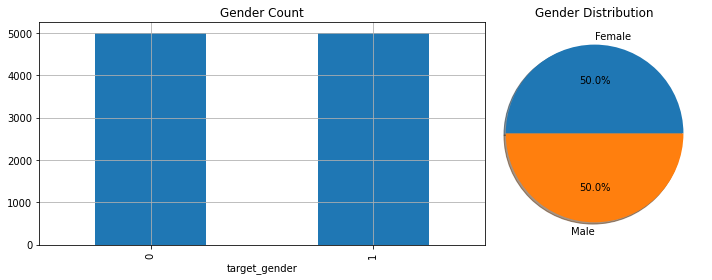

In [23]:
plt.subplot(1, 2, 1)
pd_result.groupby('target_gender')['filename'].count().plot.bar()
plt.grid(True)
plt.title('Gender Count')
plt.subplots_adjust(right=1.9)

# Biểu đồ phân phối các câu hỏi 
plt.subplot(1, 2, 2)
values = [pd_result[pd_result['target_gender']==0].shape[0], pd_result[pd_result['target_gender']==1].shape[0]]
labels = ['Female', 'Male']

plt.pie(values, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title('Gender Distribution')
plt.tight_layout()
plt.subplots_adjust(right=1.9)

plt.show()


In [24]:
last_row_df = pd_result.iloc[-1:]
print(last_row_df)


                               filename                       text  up_votes  \
53135  cv-valid-train/sample-053135.mp3  i got doctor bills to pay         1   

       down_votes      age  gender accent  duration  target_gender  
53135           0  sixties  female     us       NaN              0  


In [25]:
dict_audio = dict(zip(pd_result['filename'], pd_result['target_gender']))
print(len(dict_audio))
print(type(dict_audio))

10000
<class 'dict'>


In [26]:
# dict_pairs = dict_audio.items()
# pairs_iterator = iter(dict_pairs)
# first_pair = next(pairs_iterator)
# print(first_pair)

# path = os.path.join(dir_path, first_pair[0].split("/")[0],first_pair[0])
# y, sr = librosa.load(path)
# print(y)
# print('Length of y:', len(y))
# print('y shape:', np.shape(y))
# print('Sample rate:', sr, 'KHz')
# print('Duration',librosa.get_duration(y=y, sr=sr))

In [27]:
# plt.figure(figsize = (15, 6))
# librosa.display.waveshow(y = y, sr = sr, color = "#00008B");
# plt.title("Example Sound Waves on {}".format(path.split("/")[5]), fontsize = 23);

In [28]:
# ipd.Audio(data=y, rate=sr)

## Chuyển file .mp3 sang .wav

In [29]:
# import subprocess
# import timeit
# def convert_to_wav(dict_list_audio):
#     start = timeit.default_timer()
#     for index, audio in enumerate(dict_list_audio.items()):
#         path_audio = os.path.join(dir_path,audio[0].split("/")[0],audio[0])
#         wav_file = audio[0].replace("mp3", "wav")
#         new_path_audio = os.path.join("./cv-valid-train-2", wav_file.split("/")[1])
#         # convert all file to wav, mono, sample rate 8000
#         subprocess.call(['ffmpeg', '-loglevel', 'panic', '-i',  path_audio, 
#                 '-acodec', 'pcm_s16le', '-ac', '1', '-ar', "22050", new_path_audio])
#         if (index+1)%1000 == 0 or index == len(dict_list_audio)-1:
#             stop = timeit.default_timer()
#             print('{}/{}: {}, time: {}'.format(index+1, len(dict_list_audio), new_path_audio, stop-start))
#             start = timeit.default_timer()

In [30]:
# convert_to_wav(dict_audio)

Sau khoảng 2 tiếng đã convert được 41.4k/74k file :)


# Tạo dataset 

### Trích xuất đặc trưng  

In [31]:
import os 
PATH = "../input/convert-cv-valid-2-wav"
list_file_audio = os.listdir(PATH)
print(len(list_file_audio))
print(list_file_audio[41358])

41359
sample-108475.wav


In [32]:
path_wav_test = "../input/convert-cv-valid-2-wav/sample-000005.wav"
y, sr = librosa.load(path_wav_test)
print(y)
print('Length of y:', len(y))
print('y shape:', np.shape(y))
print('Sample rate:', sr, 'KHz')
print('Duration',librosa.get_duration(y=y, sr=sr))

[0. 0. 0. ... 0. 0. 0.]
Length of y: 128596
y shape: (128596,)
Sample rate: 22050 KHz
Duration 5.832018140589569


:)) thông số giống với .mp3. Oki ổn

Giờ tạo lại dict đã


In [33]:
# dict_audio_mp3 = dict_audio
# dict_audio_wav = {}

# for audio in dict_audio_mp3.items():
#     old_path = audio[0].split("/")[1]
#     old_path = old_path.replace("mp3","wav")
#     if old_path in list_file_audio:
#         new_path = os.path.join(PATH, old_path)
#         dict_audio_wav[new_path] = audio[1]
#     else:
#         continue
# print("Convert to new dict done!!: {} files".format(len(dict_audio_wav)))

In [34]:
def extract_melspectrogram(file_path, sr=22050, n_fft=2048, hop_length=512, n_mels=128, fmin=20, fmax=8300, top_db=80):
    wav,sr = librosa.load(file_path, sr= 22050)
    spec=librosa.feature.melspectrogram(y=wav, sr=sr)
    spec_db=librosa.power_to_db(spec,top_db=top_db,ref=np.max)
    return wav, spec, spec_db

In [35]:
NEW_DIR_PATH = "../input/convert-cv-valid-2-wav"


In [36]:
def extract_features(dict_list_audio):
    values = []
    specs = []
    x = []
    count_male = 0
    count_female = 0
    for index, audio in enumerate(dict_list_audio.items()):
        
#         if(audio[1]=="1"):
#             count_male+=1
#         else:
#             count_female+=1
            
#         if count_male>5000 and count_female>5000:
#             break
#         if count_male>5000 and audio[1]=="1":
#             continue
#         else count_female>5000 and audio[1]=="1":
#             continue
            
        path_audio = os.path.join(NEW_DIR_PATH, audio[0].split("/")[3])
        wav, spec, spec_db = extract_melspectrogram(path_audio)
        eps = 1e-6
#         print(type(spec))
#         print(spec)
        spec = np.log(spec+ eps)
        spec = np.asarray(torchvision.transforms.Resize((128, 1000))(Image.fromarray(spec)))
#         x.append(spec)
#         x.append(spec)
#         x.append(spec)
#         print(type(spec))
#         print(type(x))
#         print(x)
#         print(np.array(x))
#         print(np.array(spec))
        new_entry = {}
        new_entry["values"] = np.array(spec)
        new_entry["target"] = audio[1]
        specs.append(new_entry)
        
        if (index+1)%100 ==0:
            print("{}/{}: {}".format(index, len(dict_list_audio), audio))
    return specs

### Trích xuất đặc trưng đến file pkl.

:)) Đã done nên ignore code 2 cell này

In [37]:
# training_values = extract_features(dict_audio_wav)


In [38]:
# print("Start export to pkl")
# import pickle as pkl 
# with open("./trainingMel1.pkl","wb") as handler:
#     pkl.dump(training_values, handler, protocol=pkl.HIGHEST_PROTOCOL)
# print("Save pkl done")

# Tạo dataset với pytorch 

In [39]:
from torch.utils.data import *
import lmdb
import torchvision
import pandas as pd
import numpy as np
import pickle
import torch
from PIL import Image


class AudioDataset(Dataset):
    def __init__(self, pkl_dir, dataset_name, transforms=None):
        self.data = []
        self.length = 1000
        self.transforms = transforms
        with open(pkl_dir, "rb") as f:
            self.data = pickle.load(f)
            
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        entry = self.data[idx]
        output_data = {}
        list_abc = []
        list_abc.append(entry["values"])
        list_abc.append(entry["values"])
        list_abc.append(entry["values"])
        
        values = np.array(list_abc).reshape(-1, 128, self.length)
        values = torch.Tensor(values)
        if self.transforms:
            values = self.transforms(values)
        target = torch.LongTensor([entry["target"]])
        return (values, target)

def fetch_dataloader(pkl_dir, dataset_name, batch_size, num_workers):
    dataset = AudioDataset(pkl_dir, dataset_name)
    dataloader = DataLoader(dataset, shuffle=True, batch_size=batch_size, num_workers=num_workers)
    return dataloader

In [40]:
# fetch_dataloader("./trainingMel1.pkl", "audio_dataset", 128,2)

# :) Train với pytorch

In [41]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import json
import argparse
import time

from tqdm import tqdm
from tensorboardX import SummaryWriter

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [42]:
def evaluate(model, device, test_loader):
    correct = 0
    total = 0
    model.eval()
    with torch.no_grad():
        for batch_idx, data in enumerate(test_loader):
            inputs = data[0].to(device)
            target = data[1].squeeze(1).to(device)

            outputs = model(inputs)

            _, predicted = torch.max(outputs.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

    return (100*correct/total)


In [43]:
# Resnet18
class ResNet(nn.Module):
    def __init__(self, dataset, pretrained=True):
        super(ResNet, self).__init__()
        num_classes = 2
        self.model = models.resnet18(pretrained=pretrained)
        num_ftrs = self.model.fc.in_features
        self.model.fc = nn.Linear(num_ftrs, num_classes)

    def forward(self, x):
        output = self.model(x)
        return output

In [44]:
import shutil
def save_checkpoint(state, is_best, split, checkpoint = "./model_checkpoint"):
    filename = os.path.join(checkpoint, 'last{}.pth.tar'.format(split))
    if not os.path.exists(checkpoint):
        print("Checkpoint Directory does not exist")
        os.mkdir(checkpoint)
    torch.save(state, filename)
    if is_best:
        shutil.copyfile(filename, os.path.join(checkpoint, "model_best_{}.pth.tar".format(split)))

In [45]:
train_dataloader = fetch_dataloader("../input/training-features-cv-valid/trainingMel1.pkl", "audio_dataset", 64, 2)
val_dataloader = fetch_dataloader("../input/convert-data-in-dev-cv/trainingMel1Dev.pkl", "audio_dataset_valid", 64, 2)


In [46]:
print(len(val_dataloader))

25


In [47]:
# dataIter = iter(train_dataloader)
# images, labels = dataIter.next()

In [48]:
model = ResNet("audio_dataset").to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, weight_decay=0.001)



Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [49]:
for epoch in range(10):
    model.train()
    avg_loss  =  0
    best =0.0
    with tqdm(total = len(train_dataloader)) as t:
        sum_loss = 0
        for batch_index, data in enumerate(train_dataloader):
            inputs = data[0].to(device)
            target = data[1].squeeze(1).to(device)
            outputs = model(inputs)
            loss = loss_function(outputs, target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            sum_loss += loss.item()
            avg_loss = sum_loss/((batch_index+1)*1.0)
            t.set_postfix(loss='{:05.3f}'.format(avg_loss))
            t.update()
        acc = evaluate(model, device, val_dataloader)
        is_best = True if best < acc else False
        save_checkpoint(
            {
                "epoch":epoch,
                "model": model.state_dict,
                "optimizer": optimizer.state_dict(),
            },
            is_best,
            0
        )
    print("{}/{} epochs: loss:{}, valid acc:{}".format(epoch, 10, avg_loss,acc))


100%|██████████| 157/157 [01:35<00:00,  2.27it/s, loss=0.177]

Checkpoint Directory does not exist


100%|██████████| 157/157 [01:40<00:00,  1.56it/s, loss=0.177]


0/10 epochs: loss:0.1769964323634175, valid acc:95.0


100%|██████████| 157/157 [01:34<00:00,  1.67it/s, loss=0.067]


1/10 epochs: loss:0.06683843213898741, valid acc:95.0


100%|██████████| 157/157 [01:34<00:00,  1.66it/s, loss=0.035]


2/10 epochs: loss:0.03537809706862518, valid acc:94.35064935064935


100%|██████████| 157/157 [01:33<00:00,  1.67it/s, loss=0.014]


3/10 epochs: loss:0.01414091563205217, valid acc:96.23376623376623


100%|██████████| 157/157 [01:34<00:00,  1.66it/s, loss=0.017]


4/10 epochs: loss:0.017247624323624748, valid acc:94.28571428571429


100%|██████████| 157/157 [01:34<00:00,  1.67it/s, loss=0.009]


5/10 epochs: loss:0.008990672462216466, valid acc:95.25974025974025


100%|██████████| 157/157 [01:34<00:00,  1.67it/s, loss=0.004]


6/10 epochs: loss:0.0044900193561319334, valid acc:96.1038961038961


100%|██████████| 157/157 [01:33<00:00,  1.67it/s, loss=0.005]


7/10 epochs: loss:0.004933702446902942, valid acc:96.75324675324676


100%|██████████| 157/157 [01:34<00:00,  1.67it/s, loss=0.048]


8/10 epochs: loss:0.04779210278507067, valid acc:95.25974025974025


100%|██████████| 157/157 [01:34<00:00,  1.67it/s, loss=0.021]

9/10 epochs: loss:0.021489190446749733, valid acc:95.58441558441558
